Este projeto de análise de dados foi desenvolvido no âmbito da formação ministrada pelo professor Luke Barousse, tendo como objetivo identificar e analisar as competências mais requisitadas para três das funções mais populares no mercado de trabalho, nomeadamente: Análise de Dados, Ciência de Dados e Engenharia de Dados, com foco na realidade dos Estados Unidos. Ao longo do notebook, foram explorados diversos aspetos relacionados com os dados, de forma a garantir a obtenção dos resultados mais precisos e relevantes.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [24]:
#!pip install seaborn

In [25]:
dados = pd.read_csv("/Users/geraldocangondo/Desktop/Data_Analise/Proj_EAD_Demand/data_jobs.csv")
dados.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
115184,Data Engineer,Data Engineering & Analytics Coordinator,"Col. Agrícola Miguel Hidalgo, Oaxaca, Mexico",via SimplyHired,Full-time,False,Mexico,2023-12-15 08:40:43,False,False,Mexico,NaN,NaN,NaN,PepsiCo,"['go', 'python', 'sql', 'sql server', 'alteryx...","{'analyst_tools': ['alteryx', 'power bi'], 'da..."
117795,Data Analyst,Data Analyst,"Arlington, VA",via Career Circle,Full-time,False,"New York, United States",2023-01-27 08:00:11,False,True,United States,NaN,NaN,NaN,Booz Allen Hamilton,"['java', 'powerpoint', 'jira']","{'analyst_tools': ['powerpoint'], 'async': ['j..."
115910,Data Analyst,bi data analyst,"Munich, Germany",via BeBee,Full-time,False,Germany,2023-11-19 08:17:19,False,False,Germany,NaN,NaN,NaN,Mantaro GmbH,"['sql', 'swift', 'postgresql', 'aws', 'power b...","{'analyst_tools': ['power bi'], 'cloud': ['aws..."


In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [27]:
#Analizando dados dos EUA

data_EUA = dados[dados['job_country'] == 'United States']
data_EUA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."


In [28]:
data_EUA.describe()

,salary_year_avg,salary_hour_avg
count,15766.000000,9405.000000
mean,126134.487958,46.964981
std,48881.042901,21.470977
min,23496.000000,8.000000
25%,90000.000000,27.980000
50%,119187.500000,46.000000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [29]:
#print(data_EUA['job_skills'].apply(type))
#data_EUA['job_skills'] = data_EUA['job_skills'].apply(ast.literal_eval)
#data_EUA['job_skills'] = data_EUA['job_skills'].apply(lambda x: x if isinstance(x, list) else [])

In [39]:
data_EUA['job_skills'].isna().sum()

24125

In [40]:
data_EUA['job_skills'].isnull().sum()

24125

In [41]:

data_EUA['job_skills'] = data_EUA['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

data_EUA['job_skills'] = data_EUA['job_skills'].apply(lambda x: x if isinstance(x, list) else [])

/var/folders/r9/cpm0jkw54wbbvlfsv8p2k3h40000gp/T/ipykernel_15075/3470988280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_EUA['job_skills'] = data_EUA['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
/var/folders/r9/cpm0jkw54wbbvlfsv8p2k3h40000gp/T/ipykernel_15075/3470988280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_EUA['job_skills'] = data_EUA['job_skills'].apply(lambda x: x if isinstance(x, list) else [])


Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles.

In [42]:
data_skills = data_EUA.explode('job_skills')
data_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,NaN
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,NaN
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


Agrupa DataFrame por job_skills e job_title_short, contando as ocorrências de cada habilidade em cada título de trabalho. Em seguida, redefine o índice da Série para transformá-lo novamente em um DataFrame e renomeia a série que contém a contagem para 'count'. O DataFrame final, df_skills_count, mostra a frequência de cada habilidade com cada título de trabalho.

In [44]:
data_skills_count = data_skills.groupby(['job_skills', 'job_title_short']).size()

data_skills_count = data_skills_count.reset_index(name='skill_count')

data_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

data_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


Foco: Analistas de dados, engenheiros de dados e cientistas de dados
Filtre os cargos com base nos mais populares.

In [45]:
titulo_trabalho = data_skills_count['job_title_short'].unique().tolist()
titulo_trabalho = sorted(titulo_trabalho[:3])
titulo_trabalho

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [46]:
data_EUA.columns


Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

Cria um gráfico de barras horizontais empilhadas para as 5 principais habilidades das 3 principais funções, exibindo a frequência de cada habilidade.

Index(['job_skills', 'job_title_short', 'skill_count'], dtype='object')
Index(['job_skills', 'job_title_short', 'skill_count'], dtype='object')
Index(['job_skills', 'job_title_short', 'skill_count'], dtype='object')


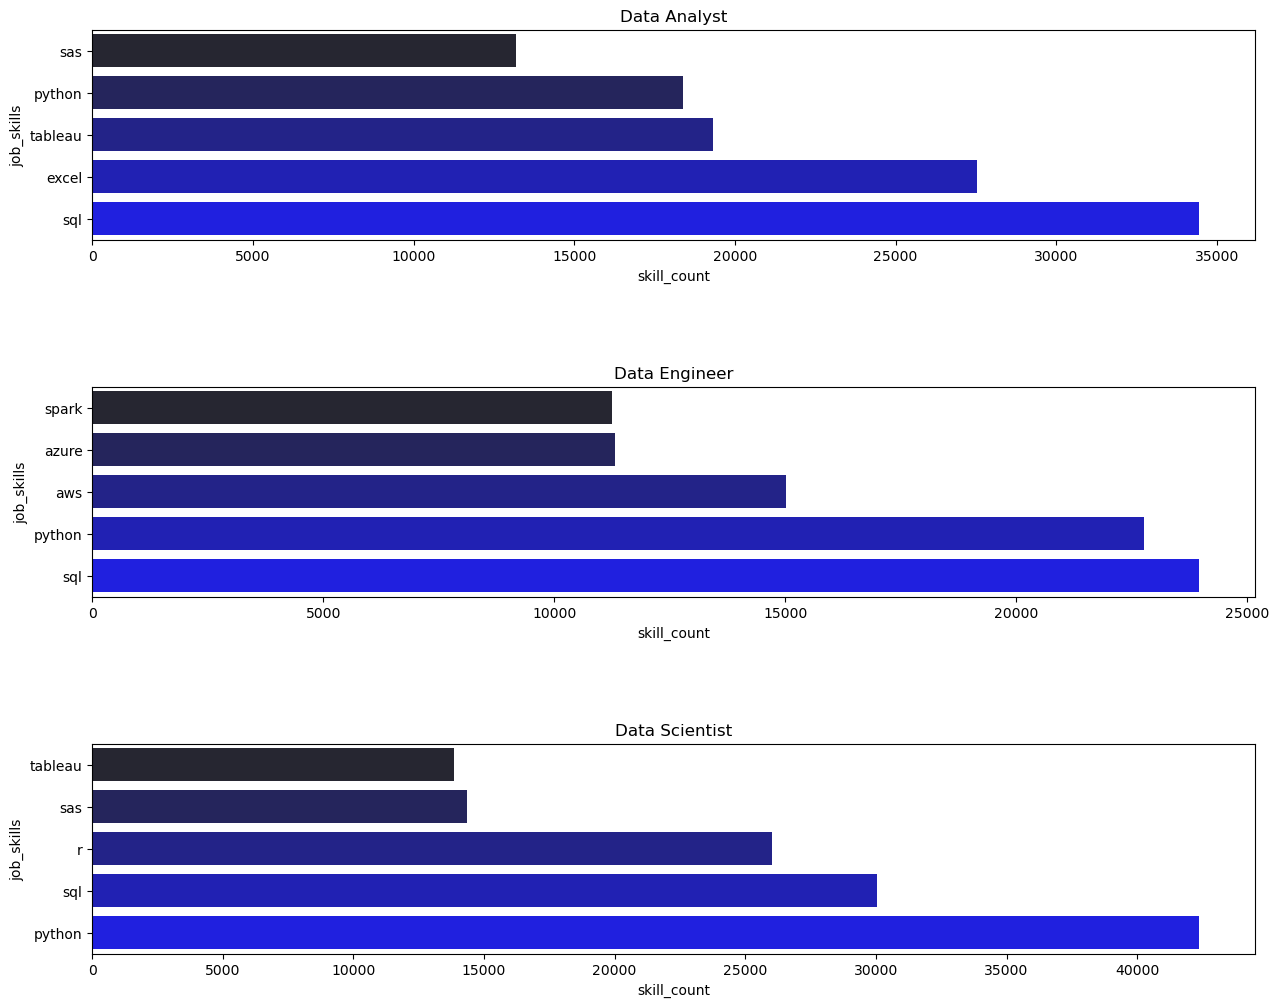

In [56]:

fig, ax = plt.subplots(len(titulo_trabalho), 1, figsize=(15, 12))

#sns.set_theme(style='ticks')
plt.subplots_adjust(hspace=0.7) 
for i, job_ti in enumerate(titulo_trabalho):
    t_trabalho = data_skills_count[data_skills_count['job_title_short'] == job_ti].head(5)
    
    # Verifique se a coluna 'skill_count' existe antes de tentar o gráfico
    print(t_trabalho.columns)  # Debug: garantir que 'skill_count' exista
    
    sns.barplot(data=t_trabalho, x='skill_count', y='job_skills', ax=ax[i], palette='dark:b_r')
    ax[i].set_title(job_ti)
    ax[i].invert_yaxis()
plt.show()

As contagens não mostram quais partes dos trabalhos estão solicitando essas habilidades
Então, converteremos as contagens em porcentagens, o que nos ajuda a entender como cada cargo representa em relação ao conjunto de dados inteiro.
Antes de calcularmos as porcentagens, precisamos das contagens totais dos trabalhos publicados por cargo. Calcule a frequência de cada cargo usando o método value_counts() na coluna job_title_short. Em seguida, redefina o índice para transformar a Série em um DataFrame e renomeie as colunas para job_title_short e total. O DataFrame df_job_title_count agora contém uma lista de cargos junto com suas ocorrências totais. As contagens não mostram quais partes dos trabalhos estão solicitando essas habilidades

In [57]:
data_job_ttle_count = data_EUA['job_title_short'].value_counts().reset_index(name='jobs_total')
data_job_ttle_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


Calculo das porcentagens: O calculo da porcentagem de cada habilidade dentro de seu título de trabalho, dividindo a contagem de habilidades pelo total de vagas de emprego e multiplicando por 100, adicionando esses novos dados como uma coluna 'percentage'.


data_skills_count

In [64]:
data_skill_perc = pd.merge(data_skills_count, data_job_ttle_count, on='job_title_short', how='left')
data_skill_perc['skill_percent'] = (data_skill_perc['skill_count'] / data_skill_perc['jobs_total']) * 100
data_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


Filtragem de um DataFrame para obter as 5 principais porcentagens de habilidades para essas 3 principais funções. Após classificar as habilidades por porcentagem decrescente, inverta a ordem dessas 5 principais entradas para usar em um gráfico de barra horizontal, que por padrão começa a plotar de baixo para cima.

In [65]:
data_skill_perc['skill_count'] = data_skill_perc['skill_count'].astype(str)

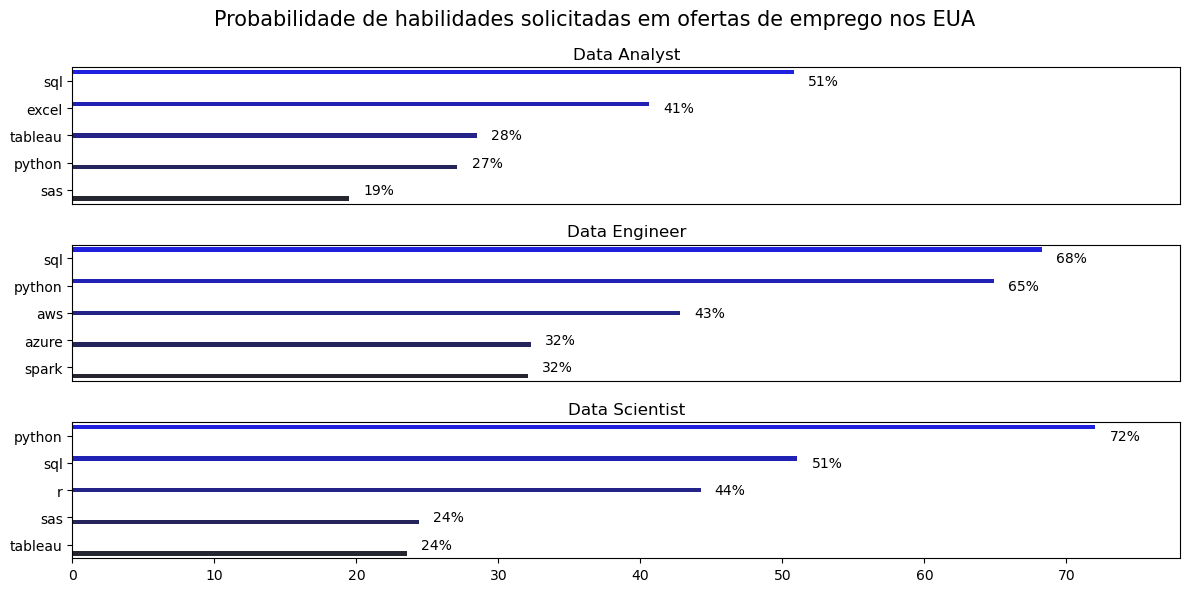

In [79]:
fig, ax = plt.subplots(len(titulo_trabalho), 1, figsize=(12, len(titulo_trabalho) * 2))

for i, job_title in enumerate(titulo_trabalho):
    data_plot = data_skill_perc[data_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=data_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(titulo_trabalho) - 1:
        ax[i].set_xticks([])
    
    # label the percentage on the bars
    for n, v in enumerate(data_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Probabilidade de habilidades solicitadas em ofertas de emprego nos EUA', fontsize=15)
fig.tight_layout(h_pad=1.5)
plt.show()

Index(['job_skills', 'job_title_short', 'skill_count'], dtype='object')
Index(['job_skills', 'job_title_short', 'skill_count'], dtype='object')
Index(['job_skills', 'job_title_short', 'skill_count'], dtype='object')


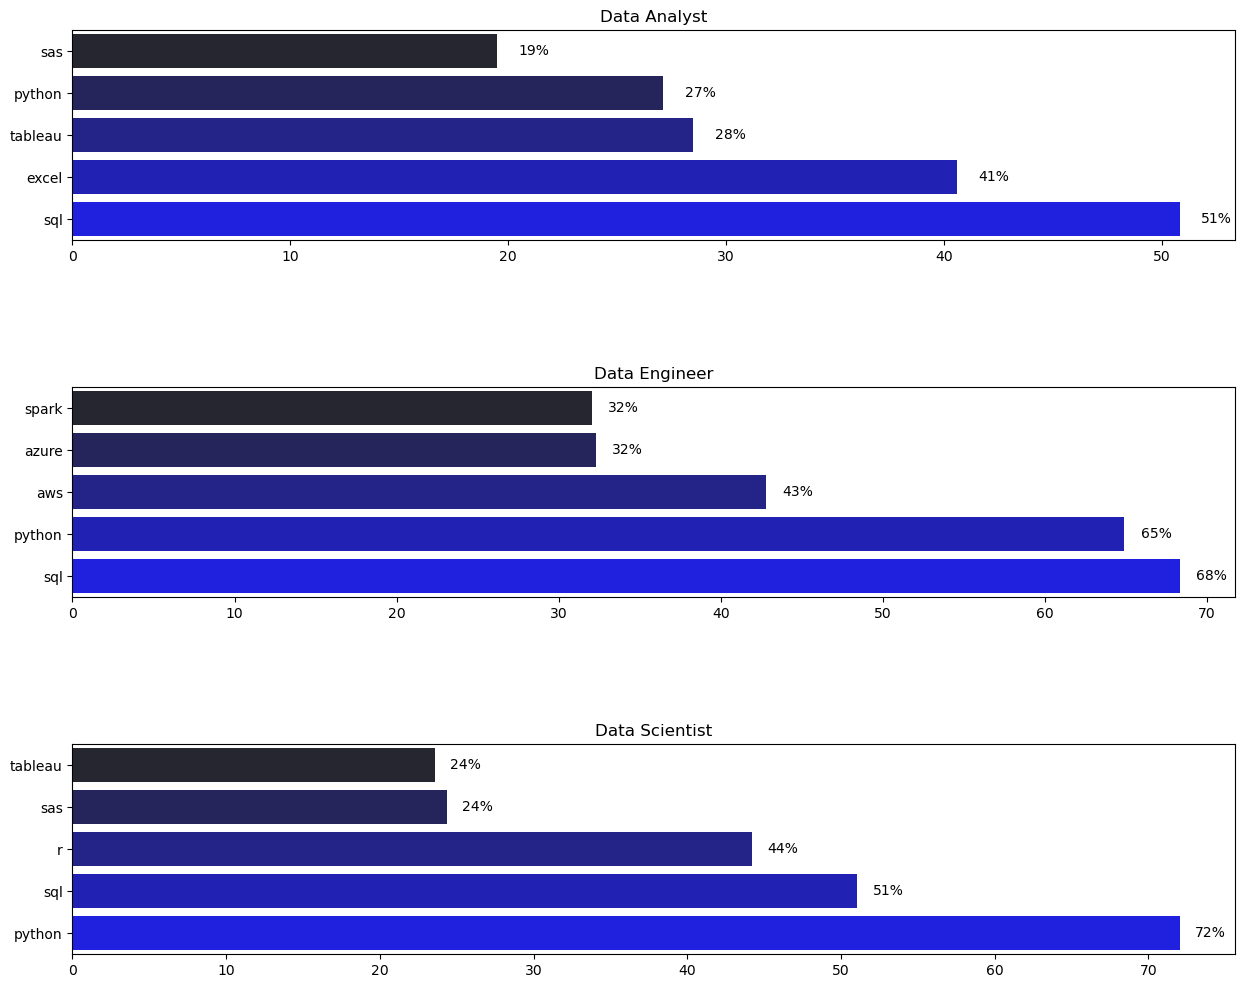

In [84]:

fig, ax = plt.subplots(len(titulo_trabalho), 1, figsize=(15, 12))

#sns.set_theme(style='ticks')
plt.subplots_adjust(hspace=0.7) 
for i, job_title in enumerate(titulo_trabalho):
    data_plot = data_skill_perc[data_skill_perc['job_title_short'] == job_title].head(5)
    
    
    # Verifique se a coluna 'skill_count' existe antes de tentar o gráfico
    print(t_trabalho.columns)  # Debug: garantir que 'skill_count' exista
    
   
    sns.barplot(data=data_plot, x='skill_percent', y='job_skills', ax=ax[i],  palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

    for n, v in enumerate(data_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
plt.show()